In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r"C:\Users\pujal\Downloads\survey.xls")

In [3]:
data

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [4]:
data1=data.copy()

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12 non-null     object
 1   Nationality  12 non-null     object
 2   Sex          12 non-null     object
 3   Age          12 non-null     int64 
 4   Handedness   12 non-null     object
dtypes: int64(1), object(4)
memory usage: 608.0+ bytes


In [7]:
# from given data there are 12 entries with 5 columns with no-null values,
#outof 5 columns 1-column is numerical remainning all object columns

In [8]:
data1.columns

Index(['Name', 'Nationality', 'Sex', 'Age', 'Handedness'], dtype='object')

In [9]:
data1["Nationality"].unique()

array(['USA', 'Bangadesh', 'India', 'China'], dtype=object)

In [10]:
# in the nationality there arw 4 countries observations are taken.

In [11]:
data1["Age"].min()

18

In [12]:
data1["Age"].max()

58

In [13]:
# the age group is taken in between 18 and 58(18>=age<=58)

In [15]:
data1["Nationality"].value_counts()

USA          4
India        3
China        3
Bangadesh    2
Name: Nationality, dtype: int64

In [16]:
# in-balanced data because from every nationality they haven't taken equal no.of data

In [17]:
data1.describe()

,Age
count,12.000000
mean,32.833333
std,12.861736
min,18.000000
25%,22.750000
50%,31.000000
75%,38.500000
max,58.000000


In [18]:
# the average age of the observents are 32
# the deviation is high so there is lot of variation in age
# q1=22.75,q2=31,q3=38.5

In [19]:
x=np.percentile(data1["Age"],[25,50,75])

In [20]:
x

array([22.75, 31.  , 38.5 ])

In [21]:
iqr=x[2]-x[0]

In [22]:
lb=x[0]-(1.5*iqr)

In [23]:
ub=x[2]+(1.5*iqr)

In [25]:
data1.loc[data1["Age"]<lb]

,Name,Nationality,Sex,Age,Handedness


In [26]:
data1.loc[data1["Age"]>ub]

,Name,Nationality,Sex,Age,Handedness


In [27]:
#from the given data there is outliers.

In [30]:
# in the data there are two types od genders are taken

In [38]:
data1["Sex"].value_counts()

Male      7
Female    5
Name: Sex, dtype: int64

In [39]:
# from the data there are 7-males and 5-females

In [35]:
g=data1.groupby("Sex")

In [44]:
m=g.get_group("Male")

In [42]:
f=g.get_group("Female")

In [45]:
m.min()

Name              Dhaval
Nationality    Bangadesh
Sex                 Male
Age                   19
Handedness          Left
dtype: object

In [46]:
m.max()

Name           Sudhir
Nationality       USA
Sex              Male
Age                43
Handedness      Right
dtype: object

In [47]:
#from the given data the min age of the male is 19 and max is 43(19>=male<=43)

In [48]:
f.min()

Name              Fatima
Nationality    Bangadesh
Sex               Female
Age                   18
Handedness          Left
dtype: object

In [49]:
f.max()

Name              Yan
Nationality       USA
Sex            Female
Age                58
Handedness      Right
dtype: object

In [50]:
#from the given data the min age of female is 18 and max is 58.(18>=female<=58)

In [51]:
m.describe()

,Age
count,7.000000
mean,30.285714
std,8.693183
min,19.000000
25%,23.500000
50%,31.000000
75%,36.000000
max,43.000000


In [ ]:
# the average age of the male is 30
# 25% males are less than 23 years old
#25% males are greater than 36 years old
#50% of males are in the age between 23-36

In [53]:
f.describe()

,Age
count,5.000000
mean,36.400000
std,17.728508
min,18.000000
25%,23.000000
50%,31.000000
75%,52.000000
max,58.000000


In [54]:
# the average age of the female is 36
# 25% females are less than 23 years old
# 25% females are greater than 52 years old
#50% of females are in between age is 23-52

In [55]:
# if we compare the deviation of both male and female the fluctaion is high in the female compared to male
#the age groupe less than 23 years in male and female is same no of observations.

In [57]:
h=data1.groupby("Nationality")

In [59]:
usa=h.get_group("USA")

In [62]:
usa.describe()

,Age
count,4.000000
mean,20.500000
std,2.380476
min,18.000000
25%,18.750000
50%,20.500000
75%,22.250000
max,23.000000


In [ ]:
# the average age of the usa people is 20
# there are 4 people in the usa(both male and female)
# the min age of usa people is 18 and maximum is 23

In [70]:
ind=h.get_group("India")

In [71]:
ind.describe()

,Age
count,3.000000
mean,34.333333
std,3.055050
min,31.000000
25%,33.000000
50%,35.000000
75%,36.000000
max,37.000000


In [ ]:
#there are 3 pople in india(male and female)
#the average age of the indian people is 34
# the min age of the indians is 31 and max is 37

In [72]:
bang=h.get_group("Bangadesh")

In [74]:
bang.describe()

,Age
count,2.000000
mean,28.000000
std,4.242641
min,25.000000
25%,26.500000
50%,28.000000
75%,29.500000
max,31.000000


In [75]:
#there are 2 people in bangladesh(male and female)
# the min age is 25 and max is 31
# the average age is 28

In [76]:
china=h.get_group("China")

In [77]:
china.describe()

,Age
count,3.000000
mean,51.000000
std,7.549834
min,43.000000
25%,47.500000
50%,52.000000
75%,55.000000
max,58.000000


In [78]:
# there are 3 people in china 
# with min age is 43 and max is 58
# the average age is 51

In [79]:
hand=data.groupby("Handedness")

In [81]:
right=hand.get_group("Right")

In [82]:
right.describe()

,Age
count,5.000000
mean,29.800000
std,14.549914
min,18.000000
25%,19.000000
50%,23.000000
75%,37.000000
max,52.000000


In [83]:
# right handed people in all the country is 5
# there average age is 29
# min age is 18 and max is 52

In [86]:
left=hand.get_group("Left")

In [87]:
left.describe()

,Age
count,7.000000
mean,35.000000
std,12.206556
min,22.000000
25%,28.000000
50%,31.000000
75%,39.000000
max,58.000000


In [88]:
#total no of people with left handed is 7
#average age is 35
#min age is 22 and max is 58

In [95]:
pd.crosstab(data.Nationality,data.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [96]:
# in bangadesh people with left hand is 2 and there is right handed people
# in china there are 1 people with right hand and 2 people with left hand.
# in india 2 people with left hand and 1 with right.
# in usa 3 people with right hand and 1 with lift hand

In [101]:
pd.crosstab(data.Sex,[data.Handedness,data.Nationality],margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [102]:
## in bangladesh people with left hand is 2 one female and one male.there is no right handed.
# in china there are 1 female with right hand and 2 people with left hand one is male and one is female.
# in india 2 people with left handed from male only and 1 with right also a male,in india the total are males taken.
# in usa 3 people with right hand one is male and remainning 2 is female and 1 male with lift hand


# the people with left handed is more in alll the nationality except usa 

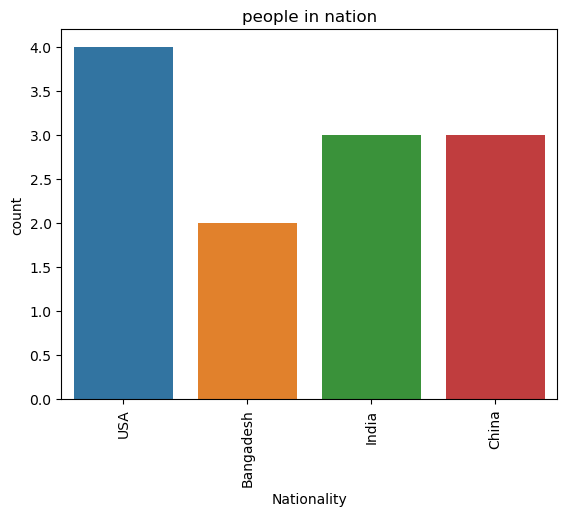

In [9]:
sns.countplot(data=data1,x="Nationality")
plt.title("people in nation")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# from the above plot we say that the people taken from the usa is high and low in bangladesh equal in china and india

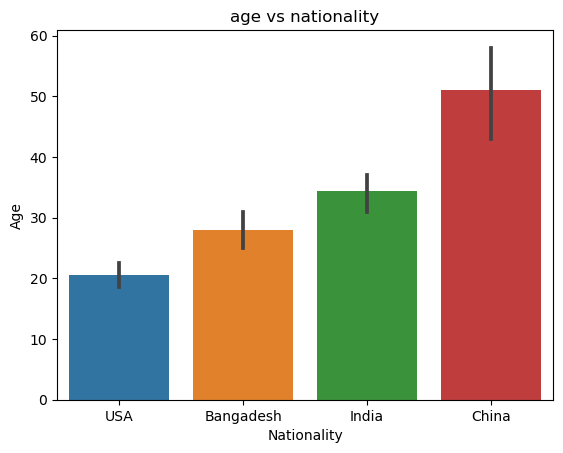

In [11]:
sns.barplot(data=data1,x="Nationality",y="Age")
plt.title("age vs nationality")
plt.show()

In [ ]:
#from the above bar plot we say that the age group of china people is high low in usa and in india and bangladesh have little difference.

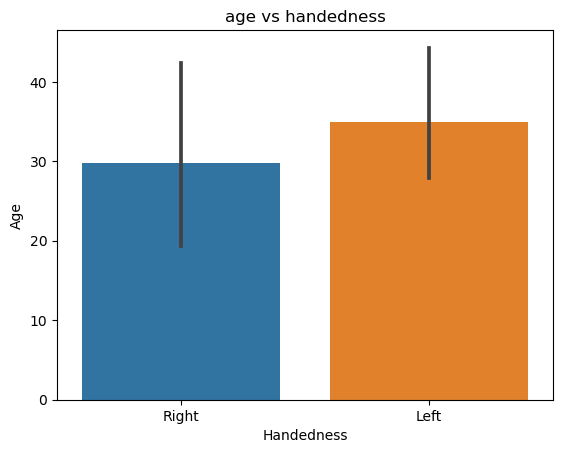

In [10]:
sns.barplot(data=data1,x="Handedness",y="Age")
plt.title("age vs handedness")
plt.show()

In [12]:
# from the above barplot we say that people with left hand is high.

C:\Users\pujal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


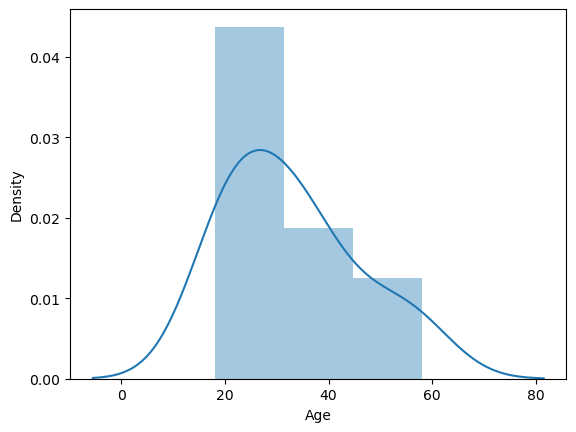

In [22]:
sns.distplot(data["Age"])
plt.show()

In [ ]:
# from the above graph we say the probability density is high for the age group of 20-40